### Marcos Hernandez

### TR 2-3:15

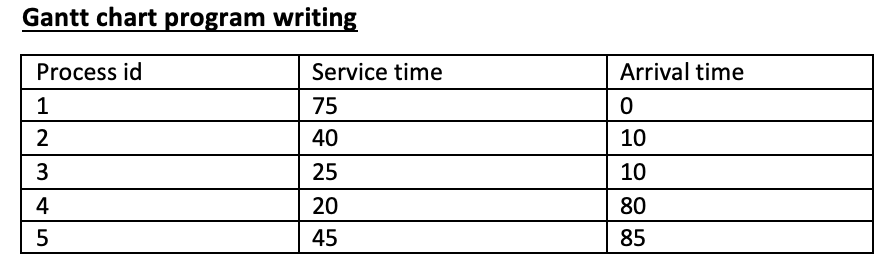

Write a computer program simulating RR scheduling for the 5 processes with arrival and service times as shown in the table above. Your program will show the progress of each process and calculate start time, end time, initial wait time, total wait time of each process. Consider two cases: 

Process id	Service time	Arrival time
1	        75	            0
2	        40	            10
3	        25	            10
4	        20	            80
5           45	            85

>Case 1: Quantum =10, context switch =0

>Case 2: Quantum =10, context switch =2

Before you start coding think critically and write clearly:<br>
•	What are the inputs of your program?<br>
•	How you will design the modules of your program.. etc


### Deliverables:  
1. your well documented source code in a word file on BB.

2. submit in class a screen shot of the output as it runs. Your output will show start time, end time, initial wait time, total wait time, turnaround time of each process in a table. One row for one process. You will have one such table with context switch 0. 

3. You will also need to demonstrate your code to me 


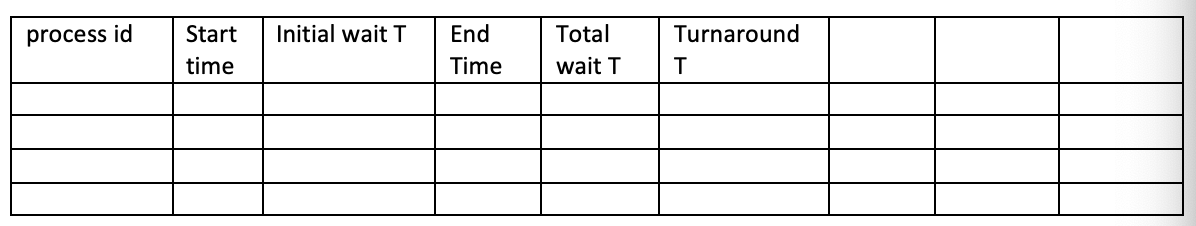

## Context Switch time = 0:

In [ ]:
# Initialize variables
quantum = 10
context_switch = 0

process_ID= [1,2,3,4,5]
service_T = [75,40,25,20,45]
arrival_T = [0,10,10,80,85]

# Create the DataFrame
import pandas as pd
process_df = pd.DataFrame(columns=["Process ID", "Start T", "Initial Wait T", "End T", "Total Wait T", "Turn Around T", "Arrival T", "Service T", "Service T Left", "Status"])

process_df["Process ID"] = process_ID
process_df["Arrival T"] = arrival_T
process_df["Service T"] = service_T
process_df["Service T Left"] = service_T
process_df["Status"] = "Has not arrived"

# Initialize queues
ready_queue = [] #processes that have newly arrived at current time
service_queue = [] #processes ready to be serviced

time = 0  # Start time

# Function to update the ready queue
def update_ready_queue():
    global ready_queue
    for index, row in process_df.iterrows():
        if row["Arrival T"] <= time and row["Status"] == "Has not arrived":
            ready_queue.append(row["Process ID"])
            process_df.loc[index, "Status"] = "Has Arrived, moving to service queue"

# Function to service the service queue
def service_service_queue():
    global time, service_queue
    for index, row in process_df[process_df["Process ID"].isin(service_queue)].iterrows():
        if pd.isnull(row["Start T"]): #If this is the firt time a processes is serviced, set "Start T" = time (current time)
            process_df.loc[index,"Start T"] = time # Set start time
            process_df.loc[index, "Initial Wait T"] = time - row["Arrival T"] # Calculate initial wait time
            print("Time:", time,"Starting Process:", row["Process ID"],"Time Left:", row["Service T Left"])
        #updating the status to "In service"
        process_df.loc[index, "Status"] = "In Service"

        if row["Service T Left"] > quantum:  # Case 1: Service time > quantum
            time += quantum
            process_df.loc[index, "Service T Left"] -= quantum
            # Move process to the back of the queue
            service_queue.append(service_queue.pop(0))
            #print("Time:", time, "Servicing Process ID number:", row["Process ID"],"Time Left:", row["Service T Left", "Status:", row["Status"]])
            print("Time:", time, "Servicing Process ID number:", row["Process ID"], "Time Left:",process_df.loc[index, "Service T Left"], "Status:", process_df.loc[index, "Status"])
        
        else:  # Case 2: Service time < or equal to quantum, meaning it will be completed
            time += row["Service T Left"]
            process_df.loc[index, "Service T Left"] = 0
            process_df.loc[index, "Status"] = "Completed"
            process_df.loc[index, "End T"] = time
            #process_df.loc[index, "Turn Around T"] = row["End T"]- row["Arrival T"]
            process_df.loc[index, "Turn Around T"] = process_df.loc[index, "End T"] - process_df.loc[index, "Arrival T"]
            #process_df.loc[index, "Total Wait T"] = row["Turn Around T"] - row["Service T"]
            process_df.loc[index, "Total Wait T"] = process_df.loc[index, "Turn Around T"] - process_df.loc[index, "Service T"]
            service_queue.pop(0)  # Remove process from the queue
            print("Time:", time,"Servicing Proces ID number:", row["Process ID"],"Time Left:", process_df.loc[index, "Service T Left"], "Status:", process_df.loc[index, "Status"])
            


# Main simulation loop
while not process_df["Status"].eq("Completed").all():
    update_ready_queue()
    if ready_queue:
        service_queue.append(ready_queue.pop(0))  # Move process from ready to service queue
    if service_queue:
        service_service_queue()
    else:
        # If no processes are in the service queue, increment time to the next arrival
        next_arrival_time = process_df.loc[process_df["Status"] == "Has not arrived", "Arrival T"].min()
        if not pd.isnull(next_arrival_time) and next_arrival_time > time:
            time = next_arrival_time
process_df

Time: 0 Starting Process: 1 Time Left: 75
Time: 10 Servicing Process ID number: 1 Time Left: 65 Status: In Service
Time: 20 Servicing Process ID number: 1 Time Left: 55 Status: In Service
Time: 20 Starting Process: 2 Time Left: 40
Time: 30 Servicing Process ID number: 2 Time Left: 30 Status: In Service
Time: 40 Servicing Process ID number: 1 Time Left: 45 Status: In Service
Time: 50 Servicing Process ID number: 2 Time Left: 20 Status: In Service
Time: 50 Starting Process: 3 Time Left: 25
Time: 60 Servicing Process ID number: 3 Time Left: 15 Status: In Service
Time: 70 Servicing Process ID number: 1 Time Left: 35 Status: In Service
Time: 80 Servicing Process ID number: 2 Time Left: 10 Status: In Service
Time: 90 Servicing Process ID number: 3 Time Left: 5 Status: In Service
Time: 100 Servicing Process ID number: 1 Time Left: 25 Status: In Service
Time: 110 Servicing Proces ID number: 2 Time Left: 0 Status: Completed
Time: 115 Servicing Proces ID number: 3 Time Left: 0 Status: Completed


,Process ID,Start T,Initial Wait T,End T,Total Wait T,Turn Around T,Arrival T,Service T,Service T Left,Status
0,1,0,0,180,105,180,0,75,0,Completed
1,2,20,10,110,60,100,10,40,0,Completed
2,3,50,40,115,80,105,10,25,0,Completed
3,4,115,35,145,45,65,80,20,0,Completed
4,5,145,60,205,75,120,85,45,0,Completed


## Context Switch time = 2:

In [26]:
# Initialize variables
quantum = 10
context_switch = 2

process_ID= [1,2,3,4,5]
service_T = [75,40,25,20,45]
arrival_T = [0,10,10,80,85]

# Create the DataFrame
import pandas as pd
process_df = pd.DataFrame(columns=["Process ID", "Start T", "Initial Wait T", "End T", "Total Wait T", "Turn Around T", "Arrival T", "Service T", "Service T Left", "Status"])

process_df["Process ID"] = process_ID
process_df["Arrival T"] = arrival_T
process_df["Service T"] = service_T
process_df["Service T Left"] = service_T
process_df["Status"] = "Has not arrived"

# Initialize queues
ready_queue = []
service_queue = []

time = 0  # Start time

# Function to update the ready queue
def update_ready_queue():
    global ready_queue
    for index, row in process_df.iterrows():
        if row["Arrival T"] <= time and row["Status"] == "Has not arrived":
            ready_queue.append(row["Process ID"])
            process_df.loc[index, "Status"] = "Has Arrived, moving to service queue"

# Function to service the service queue
def service_service_queue():
    global time, service_queue
    for index, row in process_df[process_df["Process ID"].isin(service_queue)].iterrows():
        if pd.isnull(row["Start T"]): #If this is the firt time a processes is serviced, set "Start T" = time (current time)
            process_df.loc[index,"Start T"] = time # Set start time
            process_df.loc[index, "Initial Wait T"] = time - row["Arrival T"] # Calculate initial wait time
            print("Time:", time,"Starting Process:", row["Process ID"],"Time Left:", row["Service T Left"])
        #updating the status to "In service"
        process_df.loc[index, "Status"] = "In Service"

        if row["Service T Left"] > quantum:  # Case 1: Service time > quantum
            time += quantum + context_switch
            process_df.loc[index, "Service T Left"] -= quantum
            # Move process to the back of the queue
            service_queue.append(service_queue.pop(0))
            #print("Time:", time, "Servicing Process ID number:", row["Process ID"],"Time Left:", row["Service T Left", "Status:", row["Status"]])
            print("Time:", time, "Servicing Process ID number:", row["Process ID"], "Time Left:",process_df.loc[index, "Service T Left"], "Status:", process_df.loc[index, "Status"])
        
        else:  # Case 2: Service time < or equal to quantum, meaning it will be completed
            time += row["Service T Left"]
            time+= context_switch
            process_df.loc[index, "Service T Left"] = 0
            process_df.loc[index, "Status"] = "Completed"
            process_df.loc[index, "End T"] = time
            #process_df.loc[index, "Turn Around T"] = row["End T"]- row["Arrival T"]
            process_df.loc[index, "Turn Around T"] = process_df.loc[index, "End T"] - process_df.loc[index, "Arrival T"]
            #process_df.loc[index, "Total Wait T"] = row["Turn Around T"] - row["Service T"]
            process_df.loc[index, "Total Wait T"] = process_df.loc[index, "Turn Around T"] - process_df.loc[index, "Service T"]
            service_queue.pop(0)  # Remove process from the queue
            print("Time:", time,"Servicing Proces ID number:", row["Process ID"],"Time Left:", process_df.loc[index, "Service T Left"], "Status:", process_df.loc[index, "Status"])
            


# Main simulation loop
while not process_df["Status"].eq("Completed").all():
    update_ready_queue()
    if ready_queue:
        service_queue.append(ready_queue.pop(0))  # Move process from ready to service queue
    if service_queue:
        service_service_queue()
    else:
        # If no processes are in the service queue, increment time to the next arrival
        next_arrival_time = process_df.loc[process_df["Status"] == "Has not arrived", "Arrival T"].min()
        if not pd.isnull(next_arrival_time) and next_arrival_time > time:
            time = next_arrival_time
process_df

Time: 0 Starting Process: 1 Time Left: 75
Time: 12 Servicing Process ID number: 1 Time Left: 65 Status: In Service
Time: 24 Servicing Process ID number: 1 Time Left: 55 Status: In Service
Time: 24 Starting Process: 2 Time Left: 40
Time: 36 Servicing Process ID number: 2 Time Left: 30 Status: In Service
Time: 48 Servicing Process ID number: 1 Time Left: 45 Status: In Service
Time: 60 Servicing Process ID number: 2 Time Left: 20 Status: In Service
Time: 60 Starting Process: 3 Time Left: 25
Time: 72 Servicing Process ID number: 3 Time Left: 15 Status: In Service
Time: 84 Servicing Process ID number: 1 Time Left: 35 Status: In Service
Time: 96 Servicing Process ID number: 2 Time Left: 10 Status: In Service
Time: 108 Servicing Process ID number: 3 Time Left: 5 Status: In Service
Time: 120 Servicing Process ID number: 1 Time Left: 25 Status: In Service
Time: 132 Servicing Proces ID number: 2 Time Left: 0 Status: Completed
Time: 139 Servicing Proces ID number: 3 Time Left: 0 Status: Completed

,Process ID,Start T,Initial Wait T,End T,Total Wait T,Turn Around T,Arrival T,Service T,Service T Left,Status
0,1,0,0,218,143,218,0,75,0,Completed
1,2,24,14,132,82,122,10,40,0,Completed
2,3,60,50,139,104,129,10,25,0,Completed
3,4,139,59,175,75,95,80,20,0,Completed
4,5,175,90,249,119,164,85,45,0,Completed


## Random arrival time and service time generators

In [2]:
def generate_rand_arrival_times(num_arrivals=99, min_time=4, max_time=9):# modified to return 2 arrays inter_arrival_times[] and arrival_times[]
    import random
    import numpy as np
    arrivals = []
    arrivals.append(0)
    random.seed(5)
    for i in range(num_arrivals):
        rand_int= random.randint(min_time-1, max_time)
        arrivals.append(rand_int)
    inter_arrival_times = np.array(arrivals)
    #print("Inter Arrival Times:",np.array(inter_arrival_times),"\nInter Arrival Times:",len(inter_arrival_times))
    #arrival_times = np.cumsum(inter_arrival_times) #cumulative sum is a simple alternative
    arrival_times = []
    sum=0
    for i in inter_arrival_times:
        sum+=i
        arrival_times.append(sum)
    arrival_times = np.array(arrival_times)
    #print("\nArrival Times:",arrival_times,"\nArrival Times size:",len(arrival_times))
    return inter_arrival_times ,arrival_times

In [3]:
def generate_service_times(num_service_times=100, min_time=2, max_time=5): #updated to return a service times array
    import random
    import numpy as np

    service_times = []
    random.seed(5)
    for i in range(num_service_times):
        rand_int= random.randint(min_time, max_time)
        service_times.append(rand_int)
    service_times = np.array(service_times)
    #print("Service Times:",service_times)
    #print("Service Times size:",len(service_times))
    return service_times

### Old draft moved on

In [9]:
#Testing 
time=0

ganntt_chart = []


ganntt_chart.append(["time1", "curr process1", "complete"])
ganntt_chart.append(["time2", "curr process2","incomplete- time left, quantums left"])

for i in ganntt_chart:
    print(f"Time: {i[0]},    process: {i[1]},     status:{i[2]}")



Time: time1,    process: curr process1,     status:complete
Time: time2,    process: curr process2,     status:incomplete- time left, quantums left


## Version 1

In [16]:
##Initiazlized variables
processes_to_generate= 100
quantum=5
context_switch=0

p_count= 0
q_count=0

## Generate random arrival and service times
result = generate_rand_arrival_times(99,4,9) #generating and unpacking: 
inter_arrival_times = result[0]                #inter arrival times and
arrival_times = result[1]                      #arrival times
original_service_times = generate_service_times(100,2,10) # generating service times

##creating a df 
import pandas as pd
process_df= pd.DataFrame(columns=["Process ID", "Inter Arrival T", "Arrival T", "Service T", "Service T Left", "End T", "Turn Arround T", "Total wait T", "Initial Wait T","Start T", "Status"])

process_df["Process ID"] = list(range(1,1+processes_to_generate))
process_df["Inter Arrival T"] = inter_arrival_times
process_df["Arrival T"] = arrival_times
process_df["Service T"]= original_service_times
process_df["Service T Left"] = original_service_times
process_df["Status"] = "Has not arrived"
process_df

#Need to calculate : End T, Turn Around T(If finished: End_T - Arr_Time), Total Wait T(If finished: (Turn Arr T)- (last Service_Left + Quantum*q_count) or "Turn Arround T" - "Service T" ), Start T(if start time == nan, start time== curr time), Initial Wait T(Start - arrival time), Update Status periodically(after each quantum)

##Initializing Queues
ready_queue=[] #processes that have arrived and to be appended to the service queue at the start of each new RR cycle
service_queue=[] # processes to be served once per rr cycle until each is complete

time = 0 # start time is 0 and will be updated by the quantum unless a process ends before the quantum period

#TODO: turn into a function
# check if any process arrival times are smaller than or equal to current time, if so add that processe's ID to the ready queue
##Updating ready queue
for index, row in process_df.iterrows():
    if row["Arrival T"] <= time:
        ready_queue.append(row["Process ID"]) # Adds processes IDs of processes that have arrived to the ready queue
        service= ready_queue.pop()
        service_queue.append(service)
        row["Status"] = "Has Arrived, moving to service queue"

#TODO:turn into a function
#Servicing service queue
#TURN INTO DF
#for i in service_queue: # UPDATE TIME AFTER Servicing Each Process

##Service processes in the service queue
for index, row in process_df[process_df["Process ID"].isin(service_queue)].iterrows():
        #first time being 
    if pd.isnull(row["Start T"]): #If this is the firt time a processes is serviced, set "Start T" = time (current time)
        process_df.loc[index,"Start T"] = time # Set start time
        process_df.loc[index, "Initial wait time"] = row["Start T"] - row["Arrival T"] # Calculate initial wait time

    if quantum < row["Service T Left"]: # service time bigger than quantum case, process_update, time+= quantum, move to back, next process
        # service process
        time+= quantum
        process_df.loc[index,"Service T Left"] =- quantum #reducing row's service time left by a quantum
        service_queue.append(service_queue.pop(0)) # moving serviced process to the backs of the queue
        # next
#MIGHT NOT NEED THIS CASE SINCE THE QUANTUM would be == to TIME LEFT, essentlially they are both the same
    elif quantum == row["Service T Left"]: # service completes within exact quantum time, process_update, time += quantum, remove process, next process
        time+= quantum
        process_df.loc[index, "Service T Left"]=0
        process_df.loc[index, "Status"]="Completed"
        process_df.loc[index, "End T"]= time
        process_df.loc[index, "Turn Arround T"] = row["End T"]- row["Arrival T"]
        process_df.loc[index, "Total Wait"] = row["Turn Arround T"] - row["Service T"]
        service_queue.pop(0) #remove process[i] from queue
        #next
    else:                             # service finishes before the quantum is completed, process_update, time += service_left[i], remove process, next process
        time+= row["Service T Left"]
        process_df.loc[index, "Service T Left"]= 0
        process_df.loc[index, "Status"]= "Completed"
        process_df.loc[index, "End T"] = time
        process_df.loc[index, "Turn Arround T"] = row["End T"]- row["Arrival T"]
        process_df.loc[index, "Total Wait"] = row["Turn Arround T"] - row["Service T"]
        service_queue.pop(0) #remove process from queue
        #next"

#while not process_df["Status"].eq("Completed").all():
    #1 update ready queue, by adding all arrived processes to it
     #move all ready queues to the service queue
     #service everything in queue
    #LOOP again
     #update ready queue again and repeat all until all processes are completed


In [17]:
process_df

,Process ID,Inter Arrival T,Arrival T,Service T,Service T Left,End T,Turn Arround T,Total wait T,Initial Wait T,Start T,Status,Initial wait time
0,1,0,0,6,-5,NaN,NaN,NaN,NaN,0,Has not arrived,NaN
1,2,7,7,7,7,NaN,NaN,NaN,NaN,NaN,Has not arrived,NaN
2,3,5,12,10,10,NaN,NaN,NaN,NaN,NaN,Has not arrived,NaN
3,4,8,20,2,2,NaN,NaN,NaN,NaN,NaN,Has not arrived,NaN
4,5,5,25,9,9,NaN,NaN,NaN,NaN,NaN,Has not arrived,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,6,552,7,7,NaN,NaN,NaN,NaN,NaN,Has not arrived,NaN
96,97,6,558,10,10,NaN,NaN,NaN,NaN,NaN,Has not arrived,NaN
97,98,8,566,7,7,NaN,NaN,NaN,NaN,NaN,Has not arrived,NaN
98,99,4,570,4,4,NaN,NaN,NaN,NaN,NaN,Has not arrived,NaN


## Final Version

In [21]:
# Initialize variables
processes_to_generate = 100
quantum = 5
context_switch = 0

p_count = 0
q_count = 0

#random value generator functions
def generate_service_times(num_service_times=100, min_time=2, max_time=5):
    import random
    import numpy as np

    service_times = []
    random.seed(5)
    for i in range(num_service_times):
        rand_int= random.randint(min_time, max_time)
        service_times.append(rand_int)
    service_times = np.array(service_times)
    #print("Service Times:",service_times)
    #print("Service Times size:",len(service_times))
    return service_times

def generate_rand_arrival_times(num_arrivals=99, min_time=4, max_time=9):# modified to return 2 arrays inter_arrival_times[] and arrival_times[]
    import random
    import numpy as np
    arrivals = []
    arrivals.append(0)
    random.seed(5)
    for i in range(num_arrivals):
        rand_int= random.randint(min_time-1, max_time)
        arrivals.append(rand_int)
    inter_arrival_times = np.array(arrivals)
    #print("Inter Arrival Times:",np.array(inter_arrival_times),"\nInter Arrival Times:",len(inter_arrival_times))
    #arrival_times = np.cumsum(inter_arrival_times) #cumulative sum is a simple alternative
    arrival_times = []
    sum=0
    for i in inter_arrival_times:
        sum+=i
        arrival_times.append(sum)
    arrival_times = np.array(arrival_times)
    #print("\nArrival Times:",arrival_times,"\nArrival Times size:",len(arrival_times))
    return inter_arrival_times ,arrival_times

# Generate random arrival and service times
result = generate_rand_arrival_times(99, 4, 9)
inter_arrival_times = result[0]
arrival_times = result[1]
original_service_times = generate_service_times(100, 2, 10)

# Create the DataFrame
import pandas as pd
process_df = pd.DataFrame(columns=["Process ID", "Inter Arrival T", "Arrival T", "Service T", "Service T Left", "End T", "Turn Around T", "Total Wait T", "Initial Wait T", "Start T", "Status"])

process_df["Process ID"] = list(range(1, 1 + processes_to_generate))
process_df["Inter Arrival T"] = inter_arrival_times
process_df["Arrival T"] = arrival_times
process_df["Service T"] = original_service_times
process_df["Service T Left"] = original_service_times
process_df["Status"] = "Has not arrived"

# Initialize queues
ready_queue = []
service_queue = []

time = 0  # Start time

# Function to update the ready queue
def update_ready_queue():
    global ready_queue
    for index, row in process_df.iterrows():
        if row["Arrival T"] <= time and row["Status"] == "Has not arrived":
            ready_queue.append(row["Process ID"])
            process_df.loc[index, "Status"] = "Has Arrived, moving to service queue"

# Function to service the service queue
def service_service_queue():
    global time, service_queue
    for index, row in process_df[process_df["Process ID"].isin(service_queue)].iterrows():
        if pd.isnull(row["Start T"]): #If this is the firt time a processes is serviced, set "Start T" = time (current time)
            process_df.loc[index,"Start T"] = time # Set start time
            process_df.loc[index, "Initial Wait T"] = time - row["Arrival T"] # Calculate initial wait time
            print("Time:", time,"Starting Process:", row["Process ID"],"Time Left:", row["Service T Left"])
        #updating the status to "In service"
        process_df.loc[index, "Status"] = "In Service"

        if row["Service T Left"] > quantum:  # Case 1: Service time > quantum
            time += quantum
            process_df.loc[index, "Service T Left"] -= quantum
            # Move process to the back of the queue
            service_queue.append(service_queue.pop(0))
            #print("Time:", time, "Servicing Process ID number:", row["Process ID"],"Time Left:", row["Service T Left", "Status:", row["Status"]])
            print("Time:", time, "Servicing Process ID number:", row["Process ID"], "Time Left:",process_df.loc[index, "Service T Left"], "Status:", process_df.loc[index, "Status"])
        
        else:  # Case 2: Service time < or equal to quantum, meaning it will be completed
            time += row["Service T Left"]
            process_df.loc[index, "Service T Left"] = 0
            process_df.loc[index, "Status"] = "Completed"
            process_df.loc[index, "End T"] = time
            #process_df.loc[index, "Turn Around T"] = row["End T"]- row["Arrival T"]
            process_df.loc[index, "Turn Around T"] = process_df.loc[index, "End T"] - process_df.loc[index, "Arrival T"]
            #process_df.loc[index, "Total Wait T"] = row["Turn Around T"] - row["Service T"]
            process_df.loc[index, "Total Wait T"] = process_df.loc[index, "Turn Around T"] - process_df.loc[index, "Service T"]
            service_queue.pop(0)  # Remove process from the queue
            print("Time:", time,"Servicing Proces ID number:", row["Process ID"],"Time Left:", process_df.loc[index, "Service T Left"], "Status:", process_df.loc[index, "Status"])
            


# Main simulation loop
while not process_df["Status"].eq("Completed").all():
    update_ready_queue()
    if ready_queue:
        service_queue.append(ready_queue.pop(0))  # Move process from ready to service queue
    if service_queue:
        service_service_queue()
    else:
        # If no processes are in the service queue, increment time to the next arrival
        next_arrival_time = process_df.loc[process_df["Status"] == "Has not arrived", "Arrival T"].min()
        if not pd.isnull(next_arrival_time) and next_arrival_time > time:
            time = next_arrival_time
process_df

Time: 0 Starting Process: 1 Time Left: 6
Time: 5 Servicing Process ID number: 1 Time Left: 1 Status: In Service
Time: 6 Servicing Proces ID number: 1 Time Left: 0 Status: Completed
Time: 7 Starting Process: 2 Time Left: 7
Time: 12 Servicing Process ID number: 2 Time Left: 2 Status: In Service
Time: 14 Servicing Proces ID number: 2 Time Left: 0 Status: Completed
Time: 14 Starting Process: 3 Time Left: 10
Time: 19 Servicing Process ID number: 3 Time Left: 5 Status: In Service
Time: 24 Servicing Proces ID number: 3 Time Left: 0 Status: Completed
Time: 24 Starting Process: 4 Time Left: 2
Time: 26 Servicing Proces ID number: 4 Time Left: 0 Status: Completed
Time: 26 Starting Process: 5 Time Left: 9
Time: 31 Servicing Process ID number: 5 Time Left: 4 Status: In Service
Time: 35 Servicing Proces ID number: 5 Time Left: 0 Status: Completed
Time: 35 Starting Process: 6 Time Left: 5
Time: 40 Servicing Proces ID number: 6 Time Left: 0 Status: Completed
Time: 42 Starting Process: 7 Time Left: 2
T

,Process ID,Inter Arrival T,Arrival T,Service T,Service T Left,End T,Turn Around T,Total Wait T,Initial Wait T,Start T,Status
0,1,0,0,6,0,6,6,0,0,0,Completed
1,2,7,7,7,0,14,7,0,0,7,Completed
2,3,5,12,10,0,24,12,2,2,14,Completed
3,4,8,20,2,0,26,6,4,4,24,Completed
4,5,5,25,9,0,35,10,1,1,26,Completed
...,...,...,...,...,...,...,...,...,...,...,...
95,96,6,552,7,0,580,28,21,21,573,Completed
96,97,6,558,10,0,590,32,22,22,580,Completed
97,98,8,566,7,0,597,31,24,24,590,Completed
98,99,4,570,4,0,601,31,27,27,597,Completed


### Spinner

In [2]:
from cli_spinner import CLI_Spinner
spinner = CLI_Spinner("Loading", 0.2)

spinner.start()
print("Program Logic...")
import time
time.sleep(10)
bar_len = 18
print(f"\r|"+"|"*17) #Why 18 tics? because of the Loading and the extra spinning symbol
print("Process Complete")
spinner.stop()

Program Logic...
||||||||||||||||||
Process Complete



In [ ]:
# Initialize variables
processes_to_generate = 100
quantum = 2
context_switch = 0

p_count = 0
q_count = 0

#random value generator functions
def generate_service_times(num_service_times=100, min_time=2, max_time=5):
    import random
    import numpy as np

    service_times = []
    random.seed(5)
    for i in range(num_service_times):
        rand_int= random.randint(min_time, max_time)
        service_times.append(rand_int)
    service_times = np.array(service_times)
    #print("Service Times:",service_times)
    #print("Service Times size:",len(service_times))
    return service_times

def generate_rand_arrival_times(num_arrivals=99, min_time=4, max_time=9):# modified to return 2 arrays inter_arrival_times[] and arrival_times[]
    import random
    import numpy as np
    arrivals = []
    arrivals.append(0)
    random.seed(5)
    for i in range(num_arrivals):
        rand_int= random.randint(min_time-1, max_time)
        arrivals.append(rand_int)
    inter_arrival_times = np.array(arrivals)
    #print("Inter Arrival Times:",np.array(inter_arrival_times),"\nInter Arrival Times:",len(inter_arrival_times))
    #arrival_times = np.cumsum(inter_arrival_times) #cumulative sum is a simple alternative
    arrival_times = []
    sum=0
    for i in inter_arrival_times:
        sum+=i
        arrival_times.append(sum)
    arrival_times = np.array(arrival_times)
    #print("\nArrival Times:",arrival_times,"\nArrival Times size:",len(arrival_times))
    return inter_arrival_times ,arrival_times

# Generate random arrival and service times
result = generate_rand_arrival_times(99, 5, 10)
inter_arrival_times = result[0]
arrival_times = result[1]
original_service_times = generate_service_times(100, 4, 8)

# Create the DataFrame
import pandas as pd
process_df = pd.DataFrame(columns=["Process ID", "Inter Arrival T", "Arrival T", "Service T", "Service T Left", "End T", "Turn Around T", "Total Wait T", "Initial Wait T", "Start T", "Status"])

process_df["Process ID"] = list(range(1, 1 + processes_to_generate))
process_df["Inter Arrival T"] = inter_arrival_times
process_df["Arrival T"] = arrival_times
process_df["Service T"] = original_service_times
process_df["Service T Left"] = original_service_times
process_df["Status"] = "Has not arrived"

# Initialize queues
ready_queue = []
service_queue = []

time = 0  # Start time

# Function to update the ready queue
def update_ready_queue():
    global ready_queue
    for index, row in process_df.iterrows():
        if row["Arrival T"] <= time and row["Status"] == "Has not arrived":
            ready_queue.append(row["Process ID"])
            process_df.loc[index, "Status"] = "Has Arrived, moving to service queue"

# Function to service the service queue
def service_service_queue():
    global time, service_queue
    for index, row in process_df[process_df["Process ID"].isin(service_queue)].iterrows():
        if pd.isnull(row["Start T"]): #If this is the firt time a processes is serviced, set "Start T" = time (current time)
            process_df.loc[index,"Start T"] = time # Set start time
            process_df.loc[index, "Initial Wait T"] = time - row["Arrival T"] # Calculate initial wait time
            print("Time:", time,"Starting Process:", row["Process ID"],"Time Left:", row["Service T Left"])
        #updating the status to "In service"
        process_df.loc[index, "Status"] = "In Service"

        if row["Service T Left"] > quantum:  # Case 1: Service time > quantum
            time += quantum
            process_df.loc[index, "Service T Left"] -= quantum
            # Move process to the back of the queue
            service_queue.append(service_queue.pop(0))
            #print("Time:", time, "Servicing Process ID number:", row["Process ID"],"Time Left:", row["Service T Left", "Status:", row["Status"]])
            print("Time:", time, "Servicing Process ID number:", row["Process ID"], "Time Left:",process_df.loc[index, "Service T Left"], "Status:", process_df.loc[index, "Status"])
        
        else:  # Case 2: Service time < or equal to quantum, meaning it will be completed
            time += row["Service T Left"]
            process_df.loc[index, "Service T Left"] = 0
            process_df.loc[index, "Status"] = "Completed"
            process_df.loc[index, "End T"] = time
            #process_df.loc[index, "Turn Around T"] = row["End T"]- row["Arrival T"]
            process_df.loc[index, "Turn Around T"] = process_df.loc[index, "End T"] - process_df.loc[index, "Arrival T"]
            #process_df.loc[index, "Total Wait T"] = row["Turn Around T"] - row["Service T"]
            process_df.loc[index, "Total Wait T"] = process_df.loc[index, "Turn Around T"] - process_df.loc[index, "Service T"]
            service_queue.pop(0)  # Remove process from the queue
            print("Time:", time,"Servicing Proces ID number:", row["Process ID"],"Time Left:", process_df.loc[index, "Service T Left"], "Status:", process_df.loc[index, "Status"])
            


# Main simulation loop
while not process_df["Status"].eq("Completed").all():
    update_ready_queue()
    if ready_queue:
        service_queue.append(ready_queue.pop(0))  # Move process from ready to service queue
    if service_queue:
        service_service_queue()
    else:
        # If no processes are in the service queue, increment time to the next arrival
        next_arrival_time = process_df.loc[process_df["Status"] == "Has not arrived", "Arrival T"].min()
        if not pd.isnull(next_arrival_time) and next_arrival_time > time:
            time = next_arrival_time
process_df

Time: 0 Starting Process: 1 Time Left: 8
Time: 2 Servicing Process ID number: 1 Time Left: 6 Status: In Service
Time: 4 Servicing Process ID number: 1 Time Left: 4 Status: In Service
Time: 6 Servicing Process ID number: 1 Time Left: 2 Status: In Service
Time: 8 Servicing Proces ID number: 1 Time Left: 0 Status: Completed
Time: 8 Starting Process: 2 Time Left: 6
Time: 10 Servicing Process ID number: 2 Time Left: 4 Status: In Service
Time: 12 Servicing Process ID number: 2 Time Left: 2 Status: In Service
Time: 14 Servicing Proces ID number: 2 Time Left: 0 Status: Completed
Time: 14 Starting Process: 3 Time Left: 6
Time: 16 Servicing Process ID number: 3 Time Left: 4 Status: In Service
Time: 18 Servicing Process ID number: 3 Time Left: 2 Status: In Service
Time: 20 Servicing Proces ID number: 3 Time Left: 0 Status: Completed
Time: 23 Starting Process: 4 Time Left: 8
Time: 25 Servicing Process ID number: 4 Time Left: 6 Status: In Service
Time: 27 Servicing Process ID number: 4 Time Left: 4

,Process ID,Inter Arrival T,Arrival T,Service T,Service T Left,End T,Turn Around T,Total Wait T,Initial Wait T,Start T,Status
0,1,0,0,8,0,8,8,0,0,0,Completed
1,2,8,8,6,0,14,6,0,0,8,Completed
2,3,6,14,6,0,20,6,0,0,14,Completed
3,4,9,23,8,0,31,8,0,0,23,Completed
4,5,6,29,4,0,35,6,2,2,31,Completed
5,6,10,39,7,0,46,7,0,0,39,Completed
6,7,9,48,5,0,53,5,0,0,48,Completed
7,8,10,58,4,0,62,4,0,0,58,Completed
8,9,9,67,5,0,72,5,0,0,67,Completed
9,10,9,76,4,0,80,4,0,0,76,Completed


### All of the process outputs

In [4]:
import pandas as pd
pd.set_option('display.max_rows', None)
print(process_df)

    Process ID  Inter Arrival T  Arrival T  Service T  Service T Left End T  \
0            1                0          0          6               0     6   
1            2                7          7          7               0    14   
2            3                5         12         10               0    24   
3            4                8         20          2               0    26   
4            5                5         25          9               0    35   
5            6                9         34          5               0    40   
6            7                8         42          2               0    44   
7            8                9         51          4               0    55   
8            9                8         59          3               0    62   
9           10                8         67          7               0    74   
10          11                7         74          9               0    83   
11          12                3         77          

In [14]:
# Print the results
average_turnaround_time = process_df["Turn Around T"].mean(skipna=False)
print("Average Turn Arround Time:",average_turnaround_time)

average_interarrival_time = process_df["Inter Arrival T"].mean()
print("Average Interarrival Time:", average_interarrival_time)

average_service_times = process_df["Service T"].mean()
print("Average Service Times:", average_service_times)

average_totalWait_time = process_df["Total Wait T"].mean()
print("Average Total Wait Time:", average_totalWait_time)


Average Turn Arround Time: 7.61
Average Interarrival Time: 6.72
Average Service Times: 5.86
Average Total Wait Time: 1.75
